# Decision Trees Lab

## Objectives
- Train classification and regression trees
- Visualize trees
- Explore overfitting
- Interpret feature importance


## Part 1: Decision Tree for Classification (Iris Dataset)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
fig_width = 10
fig_height = 6

In [27]:
# load data
X, y = load_iris(return_X_y=True)

Accuracy: 1.0


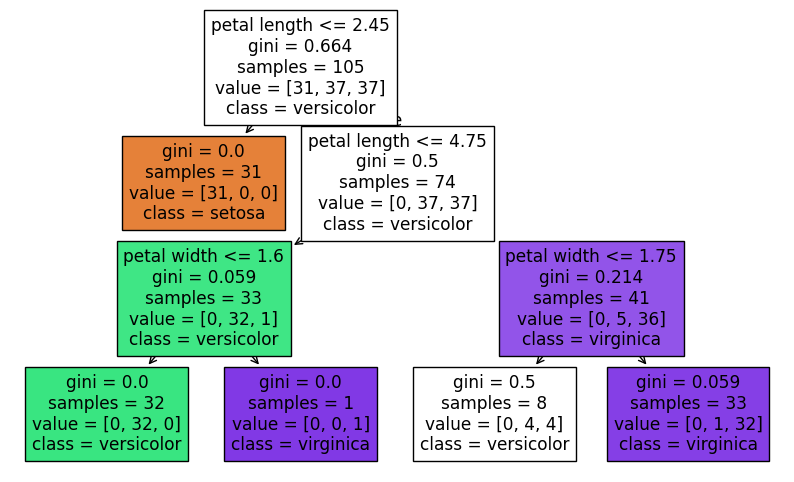

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# train-test split
decision_tree_object = DecisionTreeClassifier(max_depth=3, random_state=42)
decision_tree_object.fit(X_train, y_train)

# predict
y_pred = decision_tree_object.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# plot tree
plt.figure(figsize=(fig_width, fig_height))
plot_tree(decision_tree_object, \
          feature_names=['sepal length', 'sepal width', 'petal length', 'petal width'], \
          class_names=['setosa', 'versicolor', 'virginica'], filled=True)
plt.show()

## Part 2: Overfitting Experiment

In [ ]:
depths = range(1, 11)
train_acc = []
test_acc = []

for d in depths:
    c = DecisionTreeClassifier(max_depth=d, random_state=42)
    c.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, c.predict(X_train)))
    test_acc.append(accuracy_score(y_test, c.predict(X_test)))

plt.plot(depths, train_acc, label="Train")
plt.plot(depths, test_acc, label="Test")
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Part 3: Feature Importance

In [ ]:
importances = decision_tree_object.feature_importances_
print(importances)

## Part 4: Decision Tree for Regression

Text(0, 0.5, 'y')

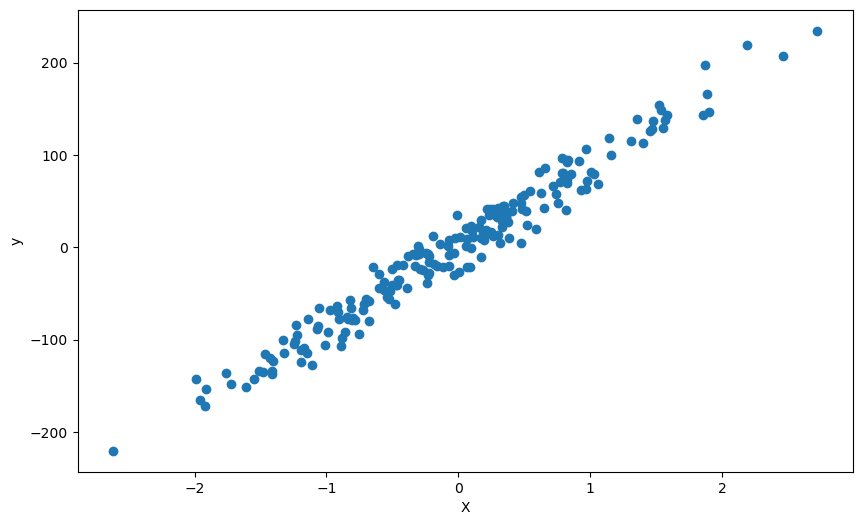

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

# Generate a random regression problem
X, y = make_regression(n_samples=200, n_features=1, noise=15, random_state=42)

fig, ax = plt.subplots(figsize=(fig_width, fig_height))
ax.scatter(X, y)
ax.set_xlabel('X')
ax.set_ylabel('y')

[Text(0.5, 0.875, 'x[0] <= -0.03\nsquared_error = 5910.96\nsamples = 140\nvalue = 0.0'),
 Text(0.25, 0.625, 'x[0] <= -0.64\nsquared_error = 2108.05\nsamples = 68\nvalue = -62.43'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[0] <= -1.37\nsquared_error = 861.36\nsamples = 34\nvalue = -101.4'),
 Text(0.0625, 0.125, 'squared_error = 252.15\nsamples = 9\nvalue = -141.09'),
 Text(0.1875, 0.125, 'squared_error = 309.62\nsamples = 25\nvalue = -87.12'),
 Text(0.375, 0.375, 'x[0] <= -0.39\nsquared_error = 316.7\nsamples = 34\nvalue = -23.46'),
 Text(0.3125, 0.125, 'squared_error = 149.43\nsamples = 14\nvalue = -39.21'),
 Text(0.4375, 0.125, 'squared_error = 138.5\nsamples = 20\nvalue = -12.43'),
 Text(0.75, 0.625, 'x[0] <= 0.78\nsquared_error = 2344.02\nsamples = 72\nvalue = 58.97'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[0] <= 0.26\nsquared_error = 458.72\nsamples = 47\nvalue = 29.73'),
 Text(0.5625, 0.125, 'squared_error = 224.15\nsamples = 19\nvalue = 13.07'),
 Text(0

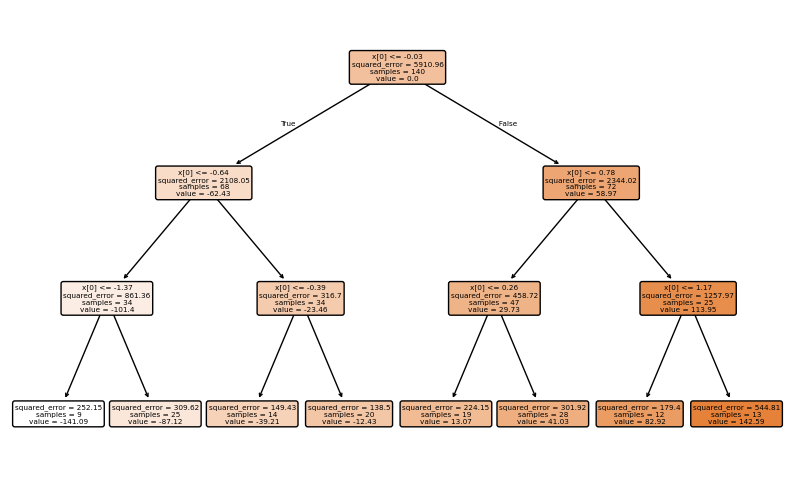

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# training
regression_object = DecisionTreeRegressor(max_depth=3, random_state=42)
regression_object.fit(X_train, y_train)

# plot the tree
plt.figure(figsize=(fig_width, fig_height))
plot_tree(regression_object, filled=True, rounded=True, precision=2)

Text(0, 0.5, 'y')

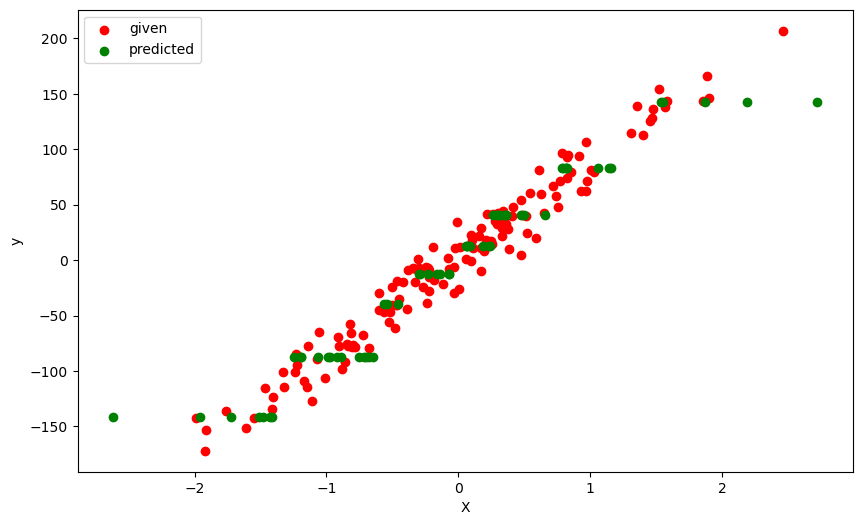

In [34]:
# prediction
y_pred = regression_object.predict(X_test)

fig, ax = plt.subplots(figsize=(fig_width, fig_height))
ax.scatter(X_train, y_train, color='red', label='given')
ax.scatter(X_test, y_pred, color='green', label='predicted')
ax.legend()
ax.set_xlabel('X')
ax.set_ylabel('y')

Measure the accuracy of regression using the Mean Squared Error (MSE).

$$
MSE = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

In [35]:
print("MSE:", mean_squared_error(y_test, y_pred))

MSE: 828.7043752351591


## Exercises
1. Change max_depth and observe results.
2. Try criterion='entropy'.
3. Train a regression tree using make_regression.
